# Explore Exercise #

<h3> Scenario </h3>

Exercises
Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

Do your work in a notebook named explore_telco. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).



- Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

- Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

- Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

- Save the functions you have written to create visualizations in a file named explore.py. Rewrite your notebook code so that you are using the functions imported from this file.

- Explore your dataset with any other visualizations you think will be helpful.

In [1]:
# import our libraries and functions

import pandas as pd
import numpy as np
import os
from datetime import date 
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

from env import host, user, password


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from wrangle_zillow import get_connection, new_zillow_data, clean_zillow, split_data, wrangle_telco

import explore

In [2]:
train, validate, test = wrangle_telco()

<h4><b>Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.</b></h4>

In [3]:
quant_vars = ['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'taxamount']

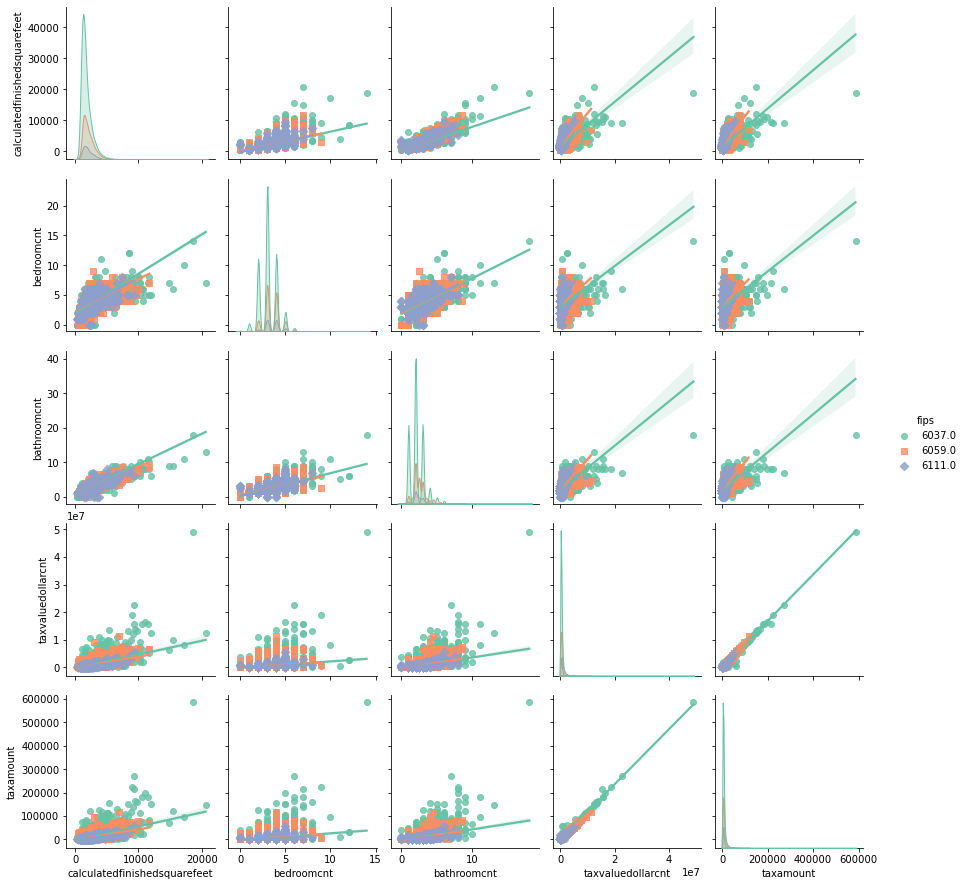

In [4]:
explore.plot_variable_pairs(train, quant_vars)

<h4><b>- Write a function named years_old that accepts your zillow churn dataframe and returns a dataframe with a new feature age_of_home in complete years.</b></h4>

In [5]:
new_train = explore.years_old(train)

In [6]:
train.head()

,parcelid,propertylandusetypeid,propertylandusedesc,transactiondate,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,fips,regionidzip,yearbuilt,taxvaluedollarcnt,assessmentyear,taxamount,latitude,longitude,age_of_home
33717,12020802,261.0,Single Family Residential,2017-06-14,2244.0,3.0,3.0,6037.0,96050.0,1977.0,2279236.0,2016.0,27404.24,34102500.0,-118378959.0,44.0
15316,10735304,261.0,Single Family Residential,2017-03-31,1936.0,3.0,2.0,6037.0,96389.0,1962.0,735000.0,2016.0,9050.20,34170368.0,-118650995.0,59.0
17549,13049827,261.0,Single Family Residential,2017-04-13,1927.0,4.0,3.0,6037.0,96494.0,1989.0,393091.0,2016.0,4884.85,34134601.0,-117757350.0,32.0
780,12278378,261.0,Single Family Residential,2017-01-06,1428.0,2.0,1.0,6037.0,96091.0,1930.0,32672.0,2016.0,845.73,33886633.0,-118207134.0,91.0
20553,14058820,261.0,Single Family Residential,2017-04-27,2168.0,5.0,4.0,6059.0,96964.0,1963.0,591995.0,2016.0,6634.94,33685599.0,-117951180.0,58.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31388 entries, 33717 to 47993
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      31388 non-null  int64  
 1   propertylandusetypeid         31388 non-null  float64
 2   propertylandusedesc           31388 non-null  object 
 3   transactiondate               31388 non-null  object 
 4   calculatedfinishedsquarefeet  31388 non-null  float64
 5   bedroomcnt                    31388 non-null  float64
 6   bathroomcnt                   31388 non-null  float64
 7   fips                          31388 non-null  float64
 8   regionidzip                   31388 non-null  float64
 9   yearbuilt                     31370 non-null  float64
 10  taxvaluedollarcnt             31388 non-null  float64
 11  assessmentyear                31388 non-null  float64
 12  taxamount                     31388 non-null  float64
 1

<h4><b>- Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.</b></h4>

In [8]:
cat_vars = ['bedroomcnt', 'fips']

In [9]:
target = train['fips']

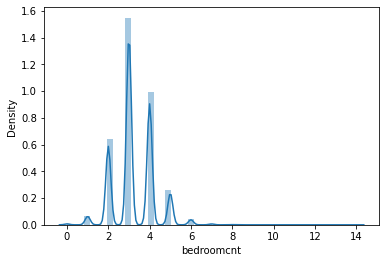

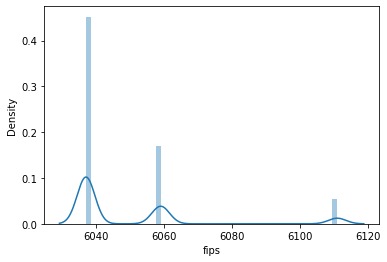

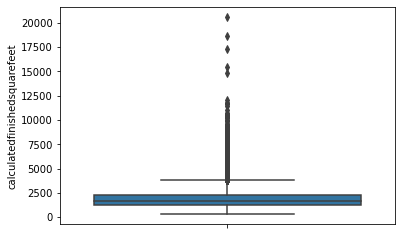

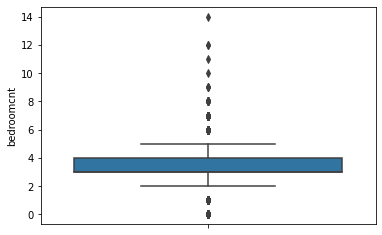

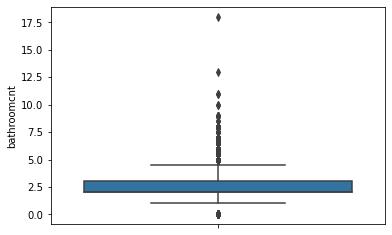

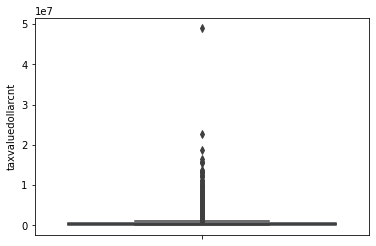

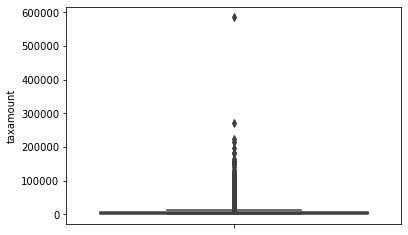

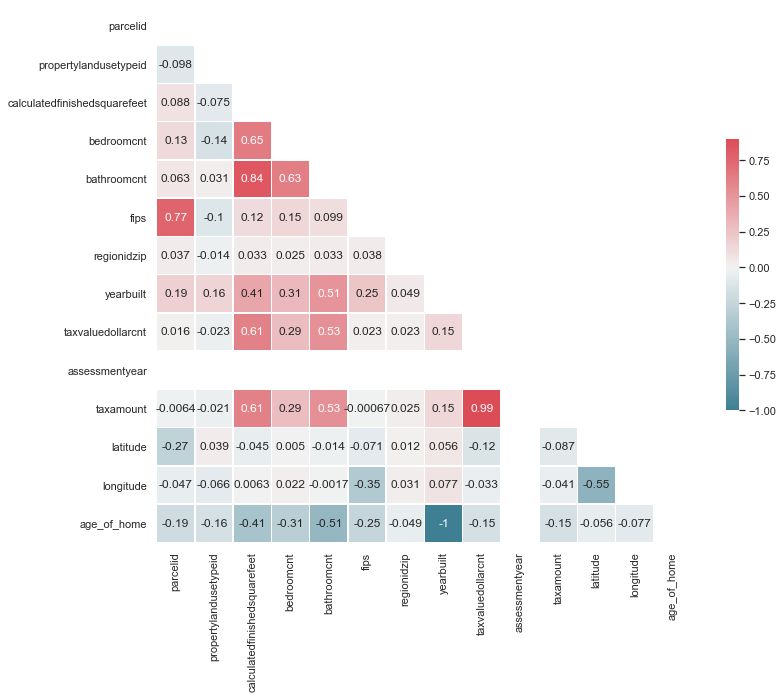

In [10]:
explore.plot_categorical_and_continuous_vars(train, target, cat_vars, quant_vars)

<h3><b>Save the functions you have written to create visualizations in a file named explore.py. Rewrite your notebook code so that you are using the functions imported from this file.</b></h3>

- this is complete and can be found in explore.py file. This notebook has been re-written using these functions

-------

<h4><b>Explore your dataset with any other visualizations you think will be helpful.</b></h4>

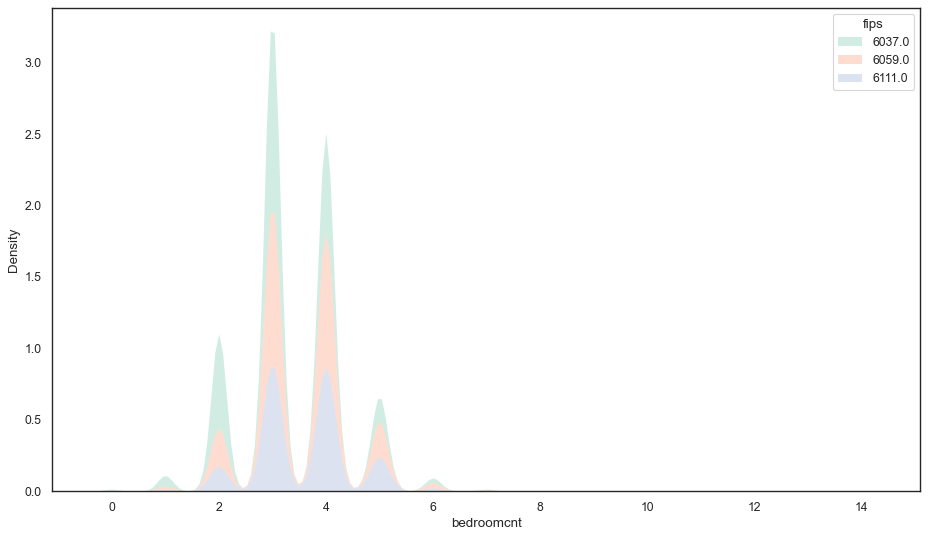

In [11]:
plt.figure(figsize=(14, 8), dpi=80)
sns.kdeplot(data=train, x="bedroomcnt", hue="fips",  multiple="stack", fill=True, common_norm=False, palette="Set2",
   alpha=.3, linewidth=0)
plt.show()

-------

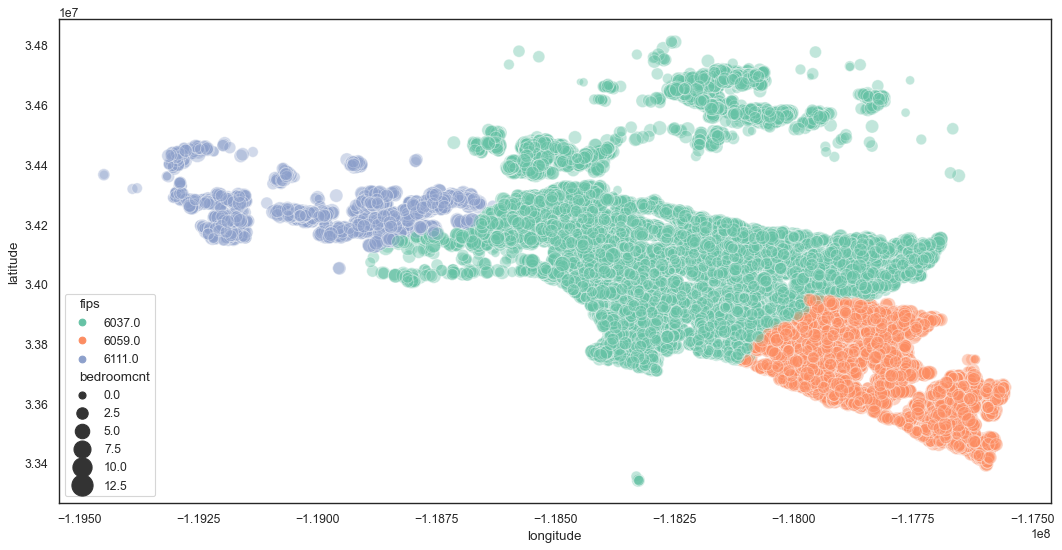

In [13]:
plt.figure(figsize=(16, 8), dpi=80)

sns.scatterplot(data=train, x="longitude", y="latitude", hue="fips", size="bedroomcnt",
                sizes=(40, 400), alpha=.4, palette="Set2")
plt.show()